# PIC 16A Final Project
## Names: Chelsea Chen and Zoe Lu


In [6]:
import numpy as np
import pandas as pd
import nltk

# Loading Datasets

In [105]:
df = pd.read_csv("fake_job_postings.csv")

In [106]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [32]:
df.shape

(17880, 18)

# EDA

# Pre-Processing

### Cleaning Word Chunks

In [20]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /Users/chenc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
import re
import nltk
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /Users/chenc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
X = df["description"]

In [64]:
documents = []
stemmer = WordNetLemmatizer()
stop_words = stopwords.words('english')
for i in range(0, len(X)):
    # Remove all the special characters, like parathesis
    document = re.sub(r'\W', ' ', str(X[i]))
    # remove all single characters: like a, b, c, d
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    
    # remove stop words
    document = [word for word in document if word not in stop_words]
    
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [53]:
len(documents)

17880

In [131]:
# now description is pre-processed
df["documents_processed"] = documents
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,documents_processed
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,food52 fast growing james beard award winning ...
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,organised focused vibrant awesome passion cust...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,client located houston actively seeking experi...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,company esri environmental system research ins...
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,job title itemization review managerlocation f...


### TF-IDF Scoring

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [83]:
# cv = CountVectorizer(max_features=1500, min_df=0.1, max_df=0.7, stop_words=stopwords.words('english'))
# X = vectorizer.fit_transform(documents).toarray()

In [90]:
cv = CountVectorizer() 
X = cv.fit_transform(documents)

In [91]:
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(X)

TfidfTransformer()

In [93]:
# storing idf scores
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 

In [95]:
# idf scores sorted
df_idf.sort_values(by=['idf_weights'])

,idf_weights
team,1.594036
work,1.705923
looking,1.972864
company,1.990627
service,2.029317
...,...
performancecomply,10.098347
developmentsearch,10.098347
performancecommunicate,10.098347
performancediscipline,10.098347


In [99]:
# calcuating tf-idf
X = cv.transform(documents) 
tf_idf_vector = tfidf_transformer.transform(X)

In [104]:
feature_names = cv.get_feature_names() 
#get tfidf vector for first document 
first_document_vector=tf_idf_vector[0] 
#print the scores 
df_idf = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df_idf.sort_values(by=["tfidf"],ascending=False)

/Users/chenc/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
affiliate,0.429461
food52,0.367379
inquiriessupporting,0.162160
meetingsworking,0.162160
programassisting,0.162160
...,...
fema,0.000000
female,0.000000
female18,0.000000
fence,0.000000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [110]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(documents)

In [118]:
df_idf2 = pd.DataFrame(tfidf_vectorizer_vectors, 
                       index=tfidf_vectorizer.get_feature_names(), 
                       columns=["tfidf"]) 

df_idf2.sort_values(by=["tfidf"],ascending=False)

/Users/chenc/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ValueError: Shape of passed values is (17880, 1), indices imply (58811, 1)

In [124]:
# tfidf vectorizer 

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_X = vectorizer.fit_transform(documents)
tf_X

<17880x58811 sparse matrix of type '<class 'numpy.float64'>'
	with 1527962 stored elements in Compressed Sparse Row format>

AttributeError: head not found

In [147]:
# splitting train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df["documents_processed"], df["fraudulent"], test_size=0.3, random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))


Train:  (12516,) (12516,) Test:  ((5364,), (5364,))


In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer()
tf_X_train = tfidf_v.fit_transform(X_train)
tf_X_test = tfidf_v.transform(X_test)

# Modeling

In [ ]:
# for classification report
from sklearn.metrics import classification_report

# for confusion matrix visual
import matplotlib.pyplot as plt
from sklearn import metrics
# for cross validation scores
from sklearn.model_selection import cross_val_score

## SVM

In [309]:
# importing svm model
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state=0)

In [310]:
# fitting model
svm.fit(tf_X_train, Y_train)

LinearSVC(random_state=0)

In [311]:
# predicting on test dataset
y_test_pred_svm = svm.predict(tf_X_test)

In [315]:
# looking at classification report
report_svm = classification_report(Y_test, y_test_pred_svm, output_dict=True)
report_svm

{'0': {'precision': 0.9811102544333077,
  'recall': 0.9990186457311089,
  'f1-score': 0.9899834678595741,
  'support': 5095},
 '1': {'precision': 0.9715909090909091,
  'recall': 0.6356877323420075,
  'f1-score': 0.7685393258426966,
  'support': 269},
 'accuracy': 0.9807979120059657,
 'macro avg': {'precision': 0.9763505817621083,
  'recall': 0.8173531890365582,
  'f1-score': 0.8792613968511354,
  'support': 5364},
 'weighted avg': {'precision': 0.9806328674278817,
  'recall': 0.9807979120059657,
  'f1-score': 0.9788782340410546,
  'support': 5364}}

Based on the classification report, our accuracy for classifying 0 or not fraudulent jobs is 99.9% while the accuracy for classifying 1 or fraudulent jobs is 63.57%. This is not the best accuracy score for 1's and can be better visualized in a confusion matrix.

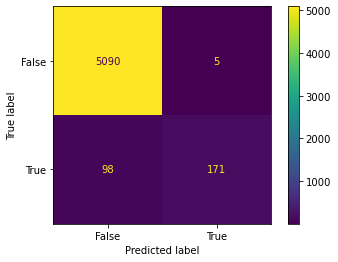

In [316]:
# confusion matrix visual
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_pred_svm)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
display.plot()
plt.show()

## Logistic Regression

In [317]:
# importing log reg model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000,solver="saga")

In [318]:
# fitting model
logreg.fit(tf_X_train,Y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [319]:
# predicting on test dataset
y_test_pred_logreg = logreg.predict(tf_X_test)

In [320]:
report = classification_report(Y_test, y_test_pred_logreg, output_dict=True)
report

{'0': {'precision': 0.9627669627669627,
  'recall': 0.9998037291462217,
  'f1-score': 0.9809358752166377,
  'support': 5095},
 '1': {'precision': 0.9863013698630136,
  'recall': 0.26765799256505574,
  'f1-score': 0.4210526315789473,
  'support': 269},
 'accuracy': 0.9630872483221476,
 'macro avg': {'precision': 0.9745341663149882,
  'recall': 0.6337308608556387,
  'f1-score': 0.7009942533977925,
  'support': 5364},
 'weighted avg': {'precision': 0.9639471931004522,
  'recall': 0.9630872483221476,
  'f1-score': 0.9528582106867087,
  'support': 5364}}

Based on the classification report, our accuracy for classifying 0 or not fraudulent jobs is 99.98% while the accuracy for classifying 1 or fraudulent jobs is 26.76%. This is definitely not ideal and can be better visualized in a confusion matrix.

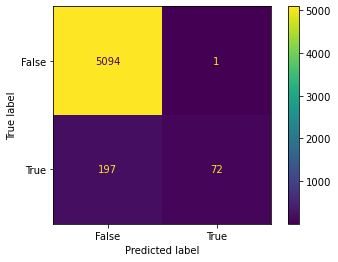

In [321]:
# confusion matrix visual
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_pred_logreg)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
display.plot()
plt.show()

### Decision Tree

In [275]:

from sklearn import tree

trees = tree.DecisionTreeClassifier(max_depth=5) 
trees.fit(tf_X_train, Y_train) 

DecisionTreeClassifier(max_depth=5)

In [308]:
tf_X_train[1,5]

0.0

In [300]:
tf_X_train.columns

AttributeError: columns not found

NameError: name 'cols' is not defined

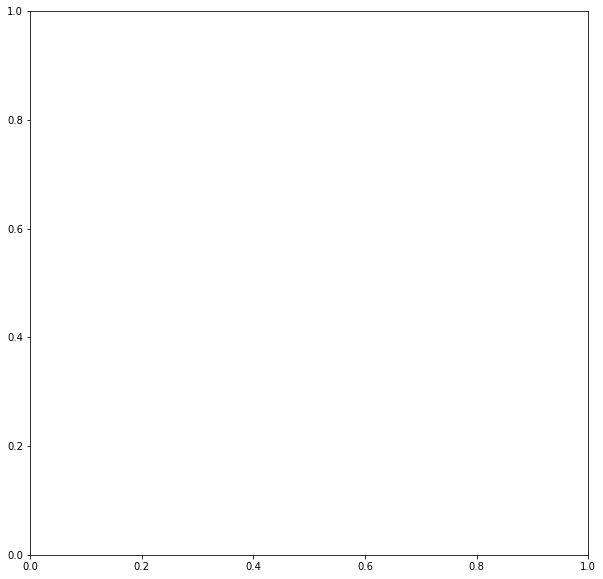

In [297]:
# visualizing tree
# def plot_tree(T, cols, figsize=(10,10)):
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
p = tree.plot_tree(trees, filled=True, feature_names = )
plt.show()

In [276]:
# accuracy scores
print(trees.score(tf_X_train, Y_train), trees.score(tf_X_test, Y_test))

0.9625279642058165 0.9573079791200596


Our accuracy score seems pretty good again; however we must analyze the amount of true positives we actually classified properly

In [277]:
y_test_pred = trees.predict(tf_X_test)

In [284]:
report = classification_report(Y_test, y_test_pred, output_dict=True)
report

{'0': {'precision': 0.9575028206092516,
  'recall': 0.9994111874386653,
  'f1-score': 0.9780082589071354,
  'support': 5095},
 '1': {'precision': 0.9347826086956522,
  'recall': 0.15985130111524162,
  'f1-score': 0.273015873015873,
  'support': 269},
 'accuracy': 0.9573079791200596,
 'macro avg': {'precision': 0.9461427146524519,
  'recall': 0.5796312442769535,
  'f1-score': 0.6255120659615042,
  'support': 5364},
 'weighted avg': {'precision': 0.9563634214659334,
  'recall': 0.9573079791200596,
  'f1-score': 0.9426534953342887,
  'support': 5364}}

Here we see the accuracy of 0's is 99.94%; however for 1's it is 15.98%. This is again not a good accuracy of classification for 1's. This can be visualized in a confusion matrix

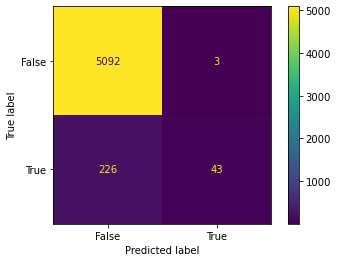

In [278]:
# confusion matrix visual
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_pred)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
display.plot()
plt.show()

# Visualizing Results